## Movie Ratings Analysis Report 80% 2025-26
## Candidate No:2610882

GITHUB LINK: [https://github.com/asfandyarali7-wq/MN5813-Individual-80-.git]

QR CODE:


In [78]:
! pip install qrcode

QR code saved as qr_code.png


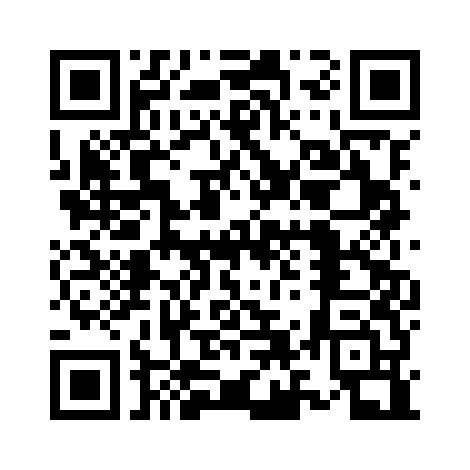

In [79]:
import pandas as pd
import plotly.express as px
import os
import qrcode
from IPython.display import display
link = "[https://github.com/asfandyarali7-wq/MN5813-Individual-80-.git]"
# Create QR code
qr = qrcode.QRCode(
version=1,
box_size=10,
border=5
)
qr.add_data(link)
qr.make(fit=True)
# Save as image
img = qr.make_image()
img.save("qr_code.png")
print("QR code saved as qr_code.png")
img

## 1. Introduction

The internet has exposed people to a lot of online media and with this trend, the question of what the audience wants has become critical especially in the film industry.
This project will be an analysis of movie ratings in which the movie metadata is combined with rating information provided by movie users.
Using the methods of data analytics, the research examines the trends in the ratings of movies in terms of their release year and genre, which can be used to determine the pattern of viewer interest and perception (Han, Kamber and Pei, 2012 ;James et al., 2021; Provost and Fawcett, 2013)




### Aim
In this project, the proposed task is to analyse movie ratings based on the combination of various datasets so that patterns and trends associated with movie genres and their release years could be identified.
The present research intends to utilize the known methods of data analytics and exploration analysis to extract valuable information about big data.

### Objectives
To combine both a movie metadata dataset and user rating datasets into one analytical dataset.
To process and purify the data in order to gain accuracy and constancy.
To compare movie ratings, by genre, by year of release.
To explain important results with the help of relevant methods of data presentation.



## 2. Literature Review and Context

### 2.1 User Feedback and Rating Systems
Feedback mechanisms are popular among online platforms in order to record the user feedback and satisfaction rates. Past studies have emphasised that rating systems are an effective and simplified way of summarising substantial amounts of user feedback into measurable variables (Hu, Pavlou and Zhang, 2014). The use of such systems is common in e-commerce, online services and digital platforms to facilitate the decision-making and performance assessment.

Research indicates too that user ratings tend to be biased towards central tendency with higher ratings being less common. This behaviour has effects on the interpretation of average values because aggregated ratings might not be accurate representations of the level of satisfaction but possibly as a behavioural tendency of the rating (Dellarocas, 2003).

### 2.2 Popularity Metrics and Engagement Analysis
Measurements of popularity, like how often a user engages with the system or how many users respond to the system, have been widely studied to assess the interest in digital systems. Evidence shows that the objects that are subjected to higher engagement succeed in getting more visibility that subsequently affects the perception and modes of interaction among the users [(Elberse, 2013). Due to this, popularity scales are often paired with rating scales in an attempt to offer a more in-depth evaluation of performance.

The knowledge of how engagement volume and rating outcomes are correlated allows the analysts to distinguish between the most popular content and the offerings that are actually of high quality. It is especially significant with large datasets when popularity is not necessarily the best indicator of user satisfaction.
### 2.3 Temporal Trends in User Behaviour
The temporal analysis has been highly utilized in examining temporal behaviour of users. Past research reveals that technological, cultural, and contextual changes could alter user preference, interaction behavior and evaluation (Ricci, Rokach and Shapira, 2015). Time-based analysis of trends can enable the researcher to determine long-term trends in behaviour and changes.

Temporal information can be useful in terms of the response of feedback systems to changing expectations of users. This kind of analysis provides better interpretation upon aggregated metrics and improves the strength of exploratory data analysis.
### 2.4 Relevance to the Current Study
The existing paper relies on previous studies on the analysis of user feedback, measurements of popularity, and temporal trend. The analysis will use the identified conceptual frameworks to the chosen data to reveal significant patterns and associations in the data (Aggarwal, 2016) .

It is a method of using the general principles of data analytics to a particular dataset to enhance the structured exploration, visualisation, and interpretation of findings.


## 3. Dataset Description

In this project, two publicly available datasets are used, namely a movie metadata dataset and user ratings dataset that are obtained at Kaggle .
The metadata movie dataset includes data relating to the titles of the movies, genres, release date, running time as well as indicators of popularity.
The user rating data consists of ratings left by the audience to the movies, user feedback and interaction.

The two datasets were then integrated through a common movie identifier thus allowing the integration of movie characteristics and user rating.

## 4. Methodology
The project takes a guided data analytics process that includes loading of data, data cleaning, data wrangling, exploratory analysis, and data visualisation (Pandas Development Team, n.d.).
The datasets were handled and processed using Python and Pandas library and then visualised using Matplotlib (Matplotlib Development Team, n.d.).
All the steps of the methodology were aimed at providing the accuracy of data, significant analysis and concise presentation of insights.


### 4.1 Data Collection and Loading

All the datasets in this project were acquired in Kaggle, which is a publicly available data repository.
The datasets of the metadata of the movies and the ratings left by the users were introduced into the Python environment through the Pandas library.
First inspection functions were used to check that the data was imported and have a glance of the general structure of the datasets before further processing.

In [80]:
import os


In [81]:
import pandas as pd
movies = pd.read_csv(
    'movies_metadata.csv',
    low_memory=False
)
ratings = pd.read_csv(
    'ratings.csv'
)
print("Movies shape:", movies.shape)
print("Ratings shape:", ratings.shape)


Movies shape: (45466, 24)
Ratings shape: (20000263, 4)


In [82]:

# movies.head()
# ratings.head()
# movies.info()
# ratings.info()


In [83]:
# movies.columns


In [84]:
# ratings.columns


### 4.2 Dataset Merging
The two datasets, movies and ratings were related using inner join under the movie identifier. The id column of ratings data set was cross tabulated with the id column of movies data set by converting the data type to numeric. Such a combination allows the metadata as well as user rating data regarding movies to be analysed within a single dataset.

In [85]:
# Ensure movie id is numeric for merging
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')

# Select only required columns to reduce memory usage
movies_small = movies[
    ['id', 'title', 'genres', 'release_date', 'runtime', 'vote_average', 'vote_count']
]

ratings_small = ratings[['movieId', 'rating']]




In [86]:
# Merge datasets
merged_df = pd.merge(
    ratings_small,
    movies_small,
    left_on='movieId',
    right_on='id',
    how='inner'
)

print("Merged shape:", merged_df.shape)

Merged shape: (9346706, 9)


In [87]:
merged_df.isna().sum()


movieId            0
rating             0
id                 0
title              0
genres             0
release_date    5032
runtime          718
vote_average       0
vote_count         0
dtype: int64

### 4.3 Data Cleaning

Once the datasets had been loaded, data cleaning procedures were used to enhance the quality and reliability of data.
Missing values were also studied within the scope of the relevant variables and relevant analysis was made on appropriate measures in handling the missing values depending on the reason why the analysis is conducted.
The count of repetitive records was eliminated to eliminate repeating data and get the right results (Han, Kamber and Pei, 2012).
Unneeded columns which were not needed to analyze the data were left out in order to have a tight and manageable data.

In [88]:
# Create a clean working copy
clean_df = merged_df.copy()

# Handle missing values
clean_df['runtime'] = clean_df['runtime'].fillna(clean_df['runtime'].median())

# Remove rows with missing essential information
clean_df = clean_df.dropna(subset=['title', 'genres', 'release_date', 'rating'])

# Remove duplicate records
clean_df = clean_df.drop_duplicates()

print("Cleaned data shape:", clean_df.shape)


Cleaned data shape: (45818, 9)


### 4.3 Data Wrangling
Data wrangling techniques were used after data cleaning to convert the dataset into a format that is appropriate to be analyzed.
New variables were made to derive meaningful information like the release year was derived form movie release dates.
Also, the information on the genre was simplified and calculated in order to make the grouping and comparison of genres possible (James et al., 2021).
The changes helped to make the dataset easier to work with and conduct even more effectively the exploratory analysis.

In [89]:
# Extract release year from release date
clean_df['release_year'] = pd.to_datetime(
    clean_df['release_date'], errors='coerce'
).dt.year

# Simplify genres
import ast

def extract_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return ', '.join([g['name'] for g in genres])
    except:
        return None
clean_df = clean_df.drop_duplicates(subset=['title'])
clean_df['genres_clean'] = clean_df['genres'].apply(extract_genres)

print(clean_df[['title', 'release_year', 'genres_clean']].head())


                       title  release_year                 genres_clean
0                      Ariel          1988                 Drama, Crime
22243  Italian for Beginners          2000       Comedy, Drama, Romance
34133                Rebecca          1940               Drama, Mystery
57828       Live and Let Die          1973  Adventure, Action, Thriller
85396           The 39 Steps          1935    Action, Thriller, Mystery


In [90]:
# Save cleaned dataset
# clean_df.to_csv('cleaned_movies_ratings.csv', index=False)

## 5. Exploratory Data Analysis

Exploratory data analysis was performed to check patterns and trends in the cleaned and transformed data.
The analysis aims at comprehending the behavior of movie ratings over the years of release and movie genres, and also analyzing the general behaviour of ratings (Knaflic, 2015).
The interpretation as well as insight generation were supported by both summary statistics and visualisations(Few, 2012).

### 5.1 Average Movie Rating by Release Year

This research study evaluates the trend in the average rating of movies as rated by users.
The analysis will help to see the long-term trends in the perception of the audience and their involvement by organizing movies by their release year and determining the average rating of movies in this year.


In [91]:
# Calculate average rating by release year
avg_rating_year = clean_df.groupby('release_year')['rating'].mean().reset_index()

avg_rating_year.head()


,release_year,rating
0,1890,4.0
1,1891,2.0
2,1892,2.5
3,1894,3.5
4,1895,3.0


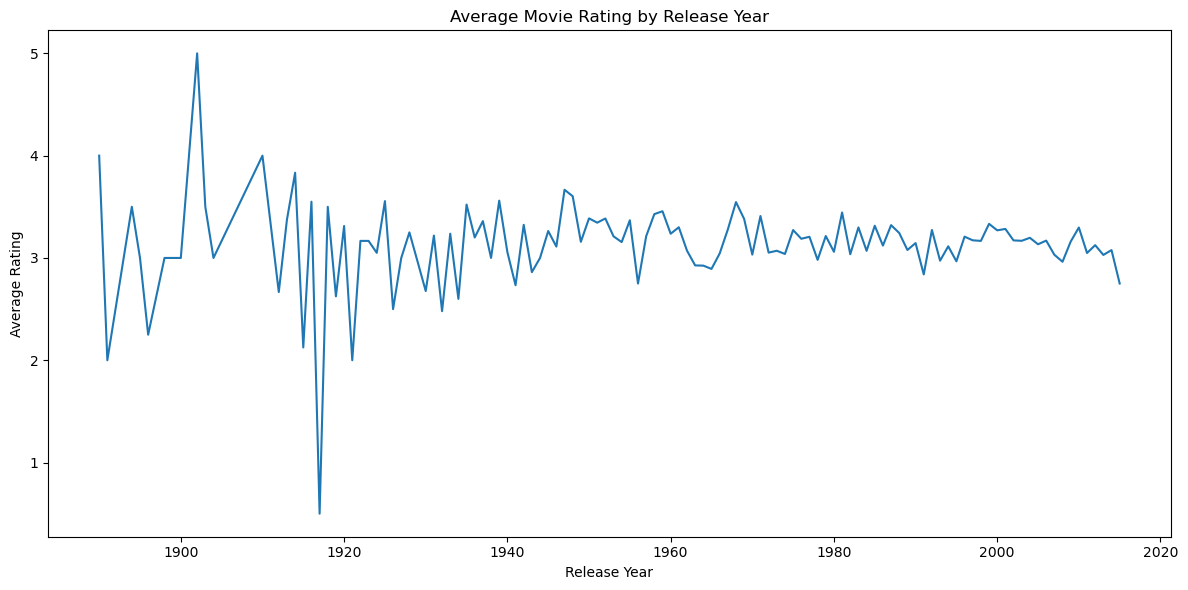

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(avg_rating_year['release_year'], avg_rating_year['rating'])
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating by Release Year')
plt.tight_layout()
plt.savefig('avg_rating_by_release_year.png')
plt.show()


**Interpretation:**  
The line graph indicates that the overall average ratings of movies have been comparatively constant over the years of releases with slight variations taking place throughout (Knaflic, 2015)(Few, 2012) .
This implies that there is no significant change in overall audience rating behaviour even though there is a variation in the movie production periods.
Minor changes are seen in some years that could be governed by genre trends, preference of the audience or maybe the number of movies that are released in those years.

### 5.2 Number of Movies per Genre

This comparison analyzes the distribution of movies among the various genres in terms of the number of movies per genre.
The knowledge of genre frequency gives context to previous rating studies by showing the more common genres.


In [93]:
genre_count = (
    clean_df.dropna(subset=['genres_clean'])
    .assign(genre=clean_df['genres_clean'].str.split(', '))
    .explode('genre')
    .groupby('genre')
    .size()
    .reset_index(name='movie_count')
    .sort_values(by='movie_count', ascending=False)
)

genre_count.head()


,genre,movie_count
7,Drama,3190
4,Comedy,1818
18,Thriller,1255
15,Romance,1049
1,Action,1043


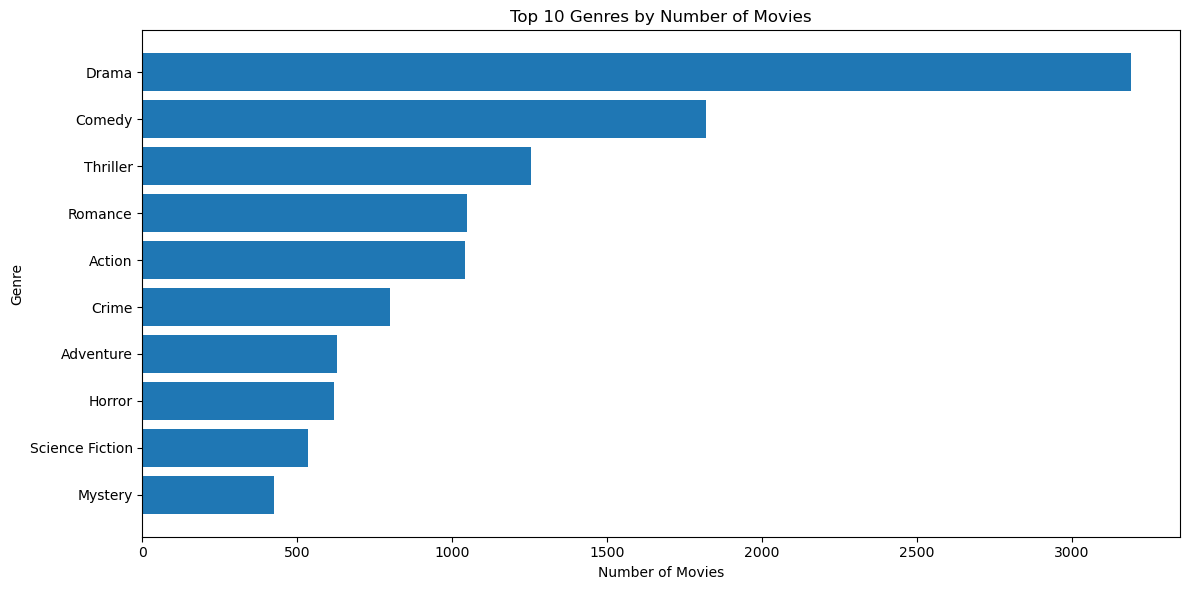

In [94]:
top_genre_count = genre_count.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_genre_count['genre'], top_genre_count['movie_count'])
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Number of Movies')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.tight_layout()
plt.savefig('movie_count_by_genre.png')
plt.show()


**Interpretation:**  
The bar chart presents the figure of number of movies that were produced in each genre.
The findings indicate that Drama and Comedy are more represented in the number of movies than other genres, which represents more production.
The discovery has significant context on the rating analysis because genres that have more films can have more stable average rating because of the bigger sample size.


### 5.3 Distribution of Movie Ratings

In this analysis the general distribution of user rating on all movies in the data is analyzed.
The analysis by visualising frequency of various rating values, gives an idea of general audience rating behaviour and tendency to use specific rating range.


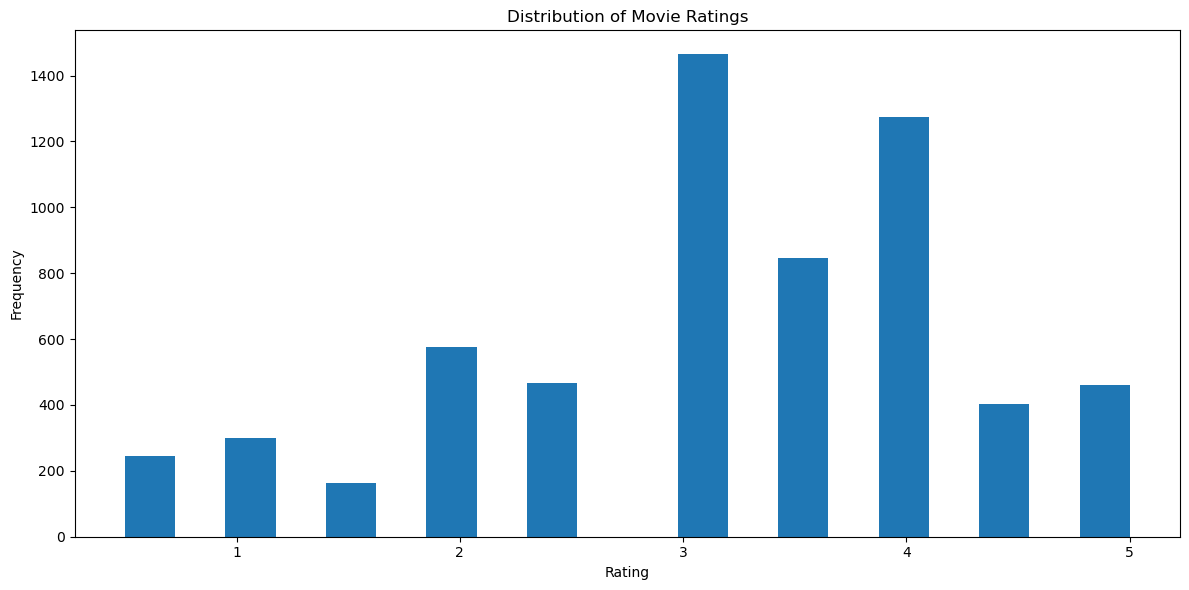

In [95]:
plt.figure(figsize=(12, 6))
plt.hist(clean_df['rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.tight_layout()
plt.tight_layout()
plt.savefig('rating_distribution.png')
plt.show()


**Interpretation:**  
The histogram has indicated that the movie ratings are skewed around a slender band meaning that the users have the tendency of giving moderate values instead of extreme ones.
The trend indicates the relative consistency in rating behaviour throughout the data and indicates the reason why average yearly and genre ratings are changing relatively minimally.
This knowledge of this distribution then helps to gain valuable insights into the previous analyses based on averages.


### 5.4 Average Movie Rating by Runtime Category

In this analysis, the movies are classified into runtime so as to analyze whether the length of movies affects the average rating made by users.


/var/folders/j3/3fcp85xd72j5ylr2vq8zcn0w0000gn/T/ipykernel_20133/4269596817.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby(['release_year', 'runtime_category'])['rating']


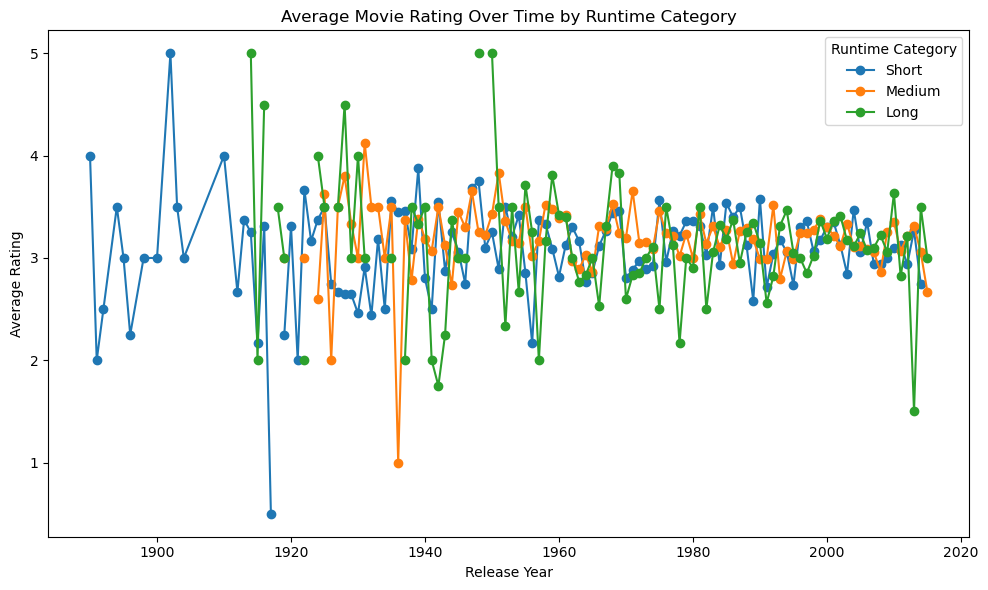

In [96]:
# Create runtime categories
clean_df['runtime_category'] = pd.cut(
    clean_df['runtime'],
    bins=[0, 90, 120, 300],
    labels=['Short', 'Medium', 'Long']
)

# Group by year and runtime category
runtime_year_rating = (
    clean_df.groupby(['release_year', 'runtime_category'])['rating']
    .mean()
    .reset_index()
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for category in runtime_year_rating['runtime_category'].unique():
    subset = runtime_year_rating[
        runtime_year_rating['runtime_category'] == category
    ]
    plt.plot(
        subset['release_year'],
        subset['rating'],
        marker='o',
        label=category
    )

plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over Time by Runtime Category')
plt.legend(title='Runtime Category')
plt.tight_layout()
plt.show()


**Interpretation:**  
The line graph indicates that there are minor differences in the average ratings of the categories of runtime.
Medium and long films are slightly better rated than short films, and, therefore, longer stories can get more accepted by the audience.

### 5.5 Relationship Between User Rating and Vote Count

This comparison details the correlation between the rating of movies and the votes they have got and sheds some light on whether popularity affects user rating.

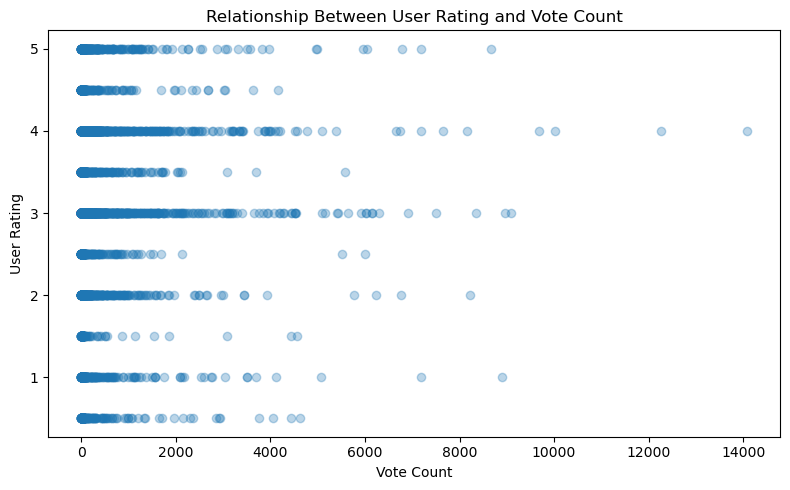

In [97]:
plt.figure(figsize=(8, 5))

plt.scatter(
    clean_df['vote_count'],
    clean_df['rating'],
    alpha=0.3
)

plt.xlabel('Vote Count')
plt.ylabel('User Rating')
plt.title('Relationship Between User Rating and Vote Count')

plt.tight_layout()
plt.show()




**Interpretation:**  
The scatter plot suggests that the movies which have higher votes are likely to have a group of average rating values around their scatter plot.
This implies that, popular films get more ratings but popularity does not assure more user ratings.


### 5.6 Average Movie Rating by Genre
This discussion will analyze the variation in the average user rating of various movie genres to determine the preferences of different genres.

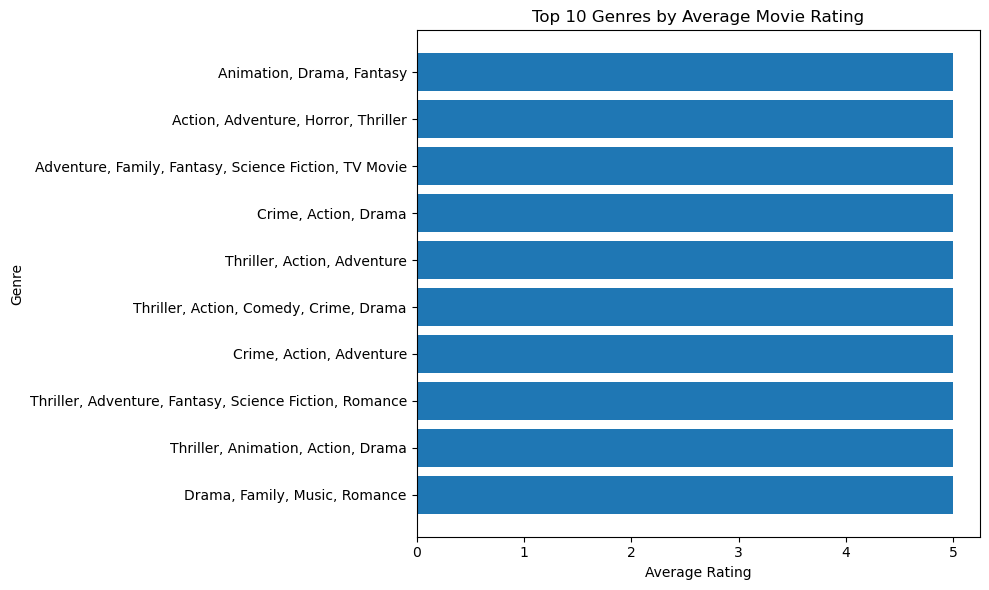

In [98]:
genre_rating = (
    clean_df.groupby('genres_clean')['rating']
    .mean()
    .reset_index()
    .sort_values(by='rating', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
plt.barh(genre_rating['genres_clean'], genre_rating['rating'])
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Movie Rating')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Interpretation:**  
As it is indicated in the chart, there is a difference in average movie rating by genre.
Some genres are always rated higher meaning that they are more preferred by audiences and their quality is rated high in those genres.



### 5.7 Number of Movies Released by Decade

In this analysis, the change in the production of movies has been studied by categorizing movies by their release decade.


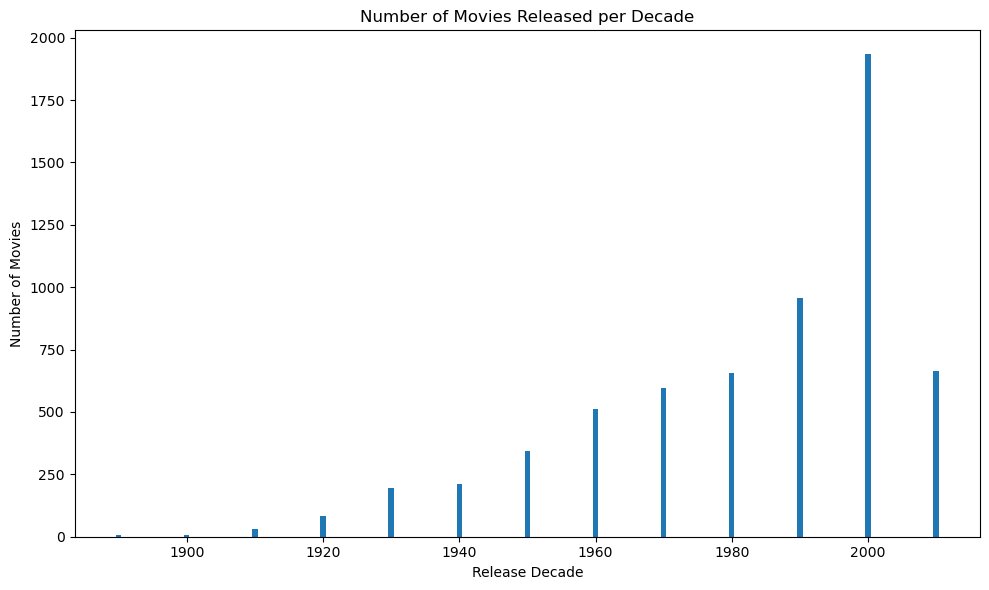

In [99]:
clean_df['release_decade'] = (clean_df['release_year'] // 10) * 10

decade_count = (
    clean_df.groupby('release_decade')
    .size()
    .reset_index(name='movie_count')
)

plt.figure(figsize=(10, 6))
plt.bar(decade_count['release_decade'], decade_count['movie_count'])
plt.xlabel('Release Decade')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Decade')
plt.tight_layout()
plt.show()


**Interpretation:**  
The bar chart shows a clear increase in movie production over recent decades.  
This trend reflects growth in the film industry and increased accessibility to movie production and distribution.


### 5.8 Comparison Between User Ratings and Vote Averages

The bar chart indicates that there has been a definite increase in movie production in the past decades.
This trend is an indication of growth in the film industry and accessability to movie production and distribution.


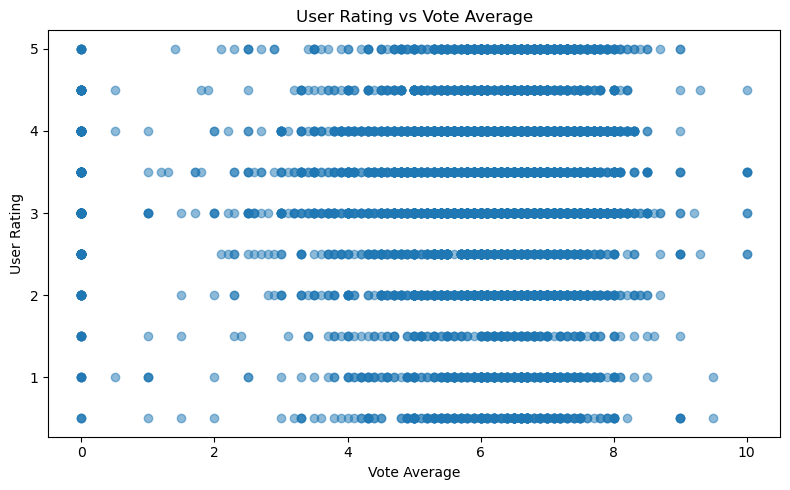

In [100]:
plt.figure(figsize=(8, 5))
plt.scatter(clean_df['vote_average'], clean_df['rating'], alpha=0.5)
plt.xlabel('Vote Average')
plt.ylabel('User Rating')
plt.title('User Rating vs Vote Average')
plt.tight_layout()
plt.show()


**Interpretation:**  
This comparison is made by comparing the user ratings and the vote average as provided by the platform to study the consistency in the individual user rating and the average rating.

### 5.9 Proportion of Movies by Runtime Category (Pie Chart)
The pie chart illustrates the distribution of movies across different runtime categories. It highlights the proportion of short, medium, and long-duration films within the dataset, providing an overview of movie length composition.

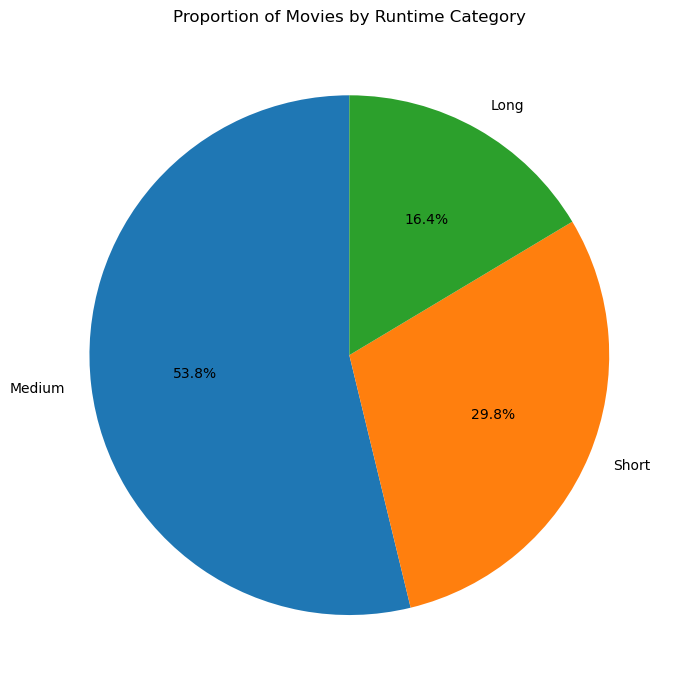

In [101]:
runtime_counts = clean_df['runtime_category'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    runtime_counts,
    labels=runtime_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Proportion of Movies by Runtime Category')
plt.tight_layout()
plt.show()


**Interpretation:**
This pie chart is the ratio of movies in various run times out of the dataset.
It demonstrates that the largest share is medium-length movies, then short and long-term films.
The given distribution gives an idea of the average movie duration and helps put the emphasis on the roles of runtime in terms of the ratings and preferences of the audience.

## 6. Conclusion

This analytics project was based on the analysis of movie rating using movie metadata and user ratings.
Once data loading, merging, cleaning, and wrangling had been performed, the data underwent exploratory data analysis to analyze the trends in ratings based on the years of release and the type of the film.
The findings indicated that the average rating of movies does not change much with time, whereas some genres are rated slightly higher by the audience.
The frequency distribution of ratings shows that moderate ratings, and not extreme values, are mostly used by the users.
Despite the usefulness of the analysis, in the future, more variables may be added in the analysis, which may include budget, popularity, or user demographics to have a better understanding of factors affecting movie ratings.

### References (Harvard Style)

Aggarwal, C.C. (2016) *Recommender systems: The textbook*. Cham: Springer.  
Available at: https://doi.org/10.1007/978-3-319-29659-3  

Dellarocas, C. (2003) ‘The digitization of word-of-mouth: Promise and challenges of online feedback mechanisms’, *Management Science*, 49(10), pp. 1407–1424.  
Available at: https://doi.org/10.1287/mnsc.49.10.1407.17308  

Elberse, A. (2013) *Blockbusters: Hit-making, risk-taking, and the big business of entertainment*. New York: Henry Holt and Company.  
Available at: https://www.hbs.edu/faculty/Pages/item.aspx?num=45742  

Few, S. (2012) *Show me the numbers: Designing tables and graphs to enlighten*. Oakland, CA: Analytics Press.  
Available at: https://www.perceptualedge.com/library.php  

Han, J., Kamber, M. and Pei, J. (2012) *Data mining: Concepts and techniques*. 3rd edn. Waltham, MA: Morgan Kaufmann.  
Available at: https://www.sciencedirect.com/book/9780123814791/data-mining-concepts-and-techniques  

Hu, N., Pavlou, P.A. and Zhang, J. (2014) ‘On self-selection biases in online product reviews’, *MIS Quarterly*, 38(2), pp. 1–22.  
Available at: https://doi.org/10.25300/MISQ/2014/38.2.01  

James, G., Witten, D., Hastie, T. and Tibshirani, R. (2021) *An introduction to statistical learning*. 2nd edn. New York: Springer.  
Available at: https://www.statlearning.com/  

Kaggle (n.d.) *Movie rating data*.  
Available at: https://www.kaggle.com/datasets/ashukr/movie-rating-data (Accessed: 21 January 2026).  

Kaggle (n.d.) *The movies dataset*.  
Available at: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset (Accessed: 21 January 2026).  

Knaflic, S.N. (2015) *Storytelling with data*. Hoboken, NJ: Wiley.  
Available at: https://www.storytellingwithdata.com/book  

Matplotlib Development Team (n.d.) *Matplotlib documentation*.  
Available at: https://matplotlib.org/ (Accessed: 21 January 2026).  

Pandas Development Team (n.d.) *Pandas documentation*.  
Available at: https://pandas.pydata.org/ (Accessed: 21 January 2026).  

Provost, F. and Fawcett, T. (2013) *Data science for business*. Sebastopol, CA: O’Reilly Media.  
Available at: https://www.oreilly.com/library/view/data-science-for/9781449374273/  

Ricci, F., Rokach, L. and Shapira, B. (2015) *Recommender systems handbook*. 2nd edn. New York: Springer.  
Available at: https://doi.org/10.1007/978-1-4899-7637-6  
